C:\Users\HP\AppData\Local\Temp\ipykernel_8776\3075585985.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].fillna(df["Year"].median(), inplace=True)


Validation RMSE: 1.206364279220863
Validation R² Score: 0.2191965578107372
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Test RMSE: 1.1905396512355204
Test R² Score: 0.21957909074073245


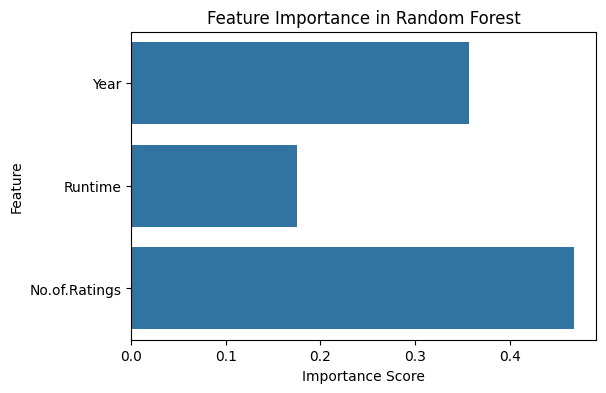

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Dataset
df = pd.read_csv("./datasets/TeluguMovies_dataset.csv")

# Step 2: Handle Missing Values
df["Year"].fillna(df["Year"].median(), inplace=True)
df["Runtime"] = df["Runtime"].astype(str).str.extract(r"(\d+)").astype(float)

df.dropna(subset=["Year", "Runtime", "Rating", "No.of.Ratings"], inplace=True)

# Step 3: Define Features & Target
features = ["Year", "Runtime", "No.of.Ratings"]
target = "Rating"

# Step 4: Split Data (Train 70%, Validation 15%, Test 15%)
train_data, test_data = train_test_split(df, test_size=0.30, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.15/0.70, random_state=42)

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]
X_test, y_test = test_data[features], test_data[target]

# Step 5: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Validate Model
y_val_pred = rf_model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE: {val_rmse}")
print(f"Validation R² Score: {val_r2}")

# Step 7: Hyperparameter Tuning
tuning_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), tuning_params, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# Step 8: Final Model on Test Set
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {test_rmse}")
print(f"Test R² Score: {test_r2}")

# Step 9: Feature Importance
importances = best_rf.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()
